## Determining state-action space size for RL.

For tabular RL we require a state-action space size that is finite and will fit in memory. 

Below we compute the state-action space size for the full task of team allocation, and for smaller component tasks. See document [reinforcement_learning_plan](reinforcement_learning_plan) for more details on this.



In [2]:
import matplotlib.pyplot as plt

In [3]:
def calculate_ss_size(W, H):
    
    return 2 * H * 5 * 5 * W * H * 5 * W * H * 5 * 2 * W * W * (W-1) * 2 * W * H   

def calculate_ss_size_hard_skills_only(W, H):
    
    return 2 * H* 5 * W * H * 5 * 2 * W * H   

In [4]:
w_list = range(101)

ss_h_1 = [calculate_ss_size(w, 1) for w in w_list]
ss_h_2 = [calculate_ss_size(w, 2) for w in w_list]
ss_h_3 = [calculate_ss_size(w, 3) for w in w_list]
ss_h_4 = [calculate_ss_size(w, 4) for w in w_list]
ss_h_5 = [calculate_ss_size(w, 5) for w in w_list]

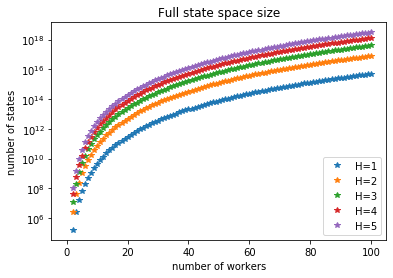

In [6]:
plt.plot(w_list, ss_h_1, '*', label='H=1')
plt.plot(w_list, ss_h_2, '*', label='H=2')
plt.plot(w_list, ss_h_3, '*', label='H=3')
plt.plot(w_list, ss_h_4, '*', label='H=4')
plt.plot(w_list, ss_h_5, '*', label='H=5')
plt.yscale('log')
plt.legend()
plt.xlabel('number of workers');
plt.ylabel('number of states');
plt.title('Full state space size');

#### This state space is very large!

The size of the action space is W * H = 500

#### So the full state-action space is size:

In [15]:
for i in [2,5,10,15,20,30,100]:
    print("%.2e for %d workers." % (calculate_ss_size(i,5) * i * 5, i))

1.00e+09 for 2 workers.
9.77e+11 for 5 workers.
1.41e+14 for 10 workers.
2.49e+15 for 15 workers.
1.90e+16 for 20 workers.
3.30e+17 for 30 workers.
1.55e+21 for 100 workers.


### For the smaller sub-task of optimising the hard skills of the team:

In [9]:
w_list = range(101)

ss_h_1 = [calculate_ss_size_hard_skills_only(w, 1) for w in w_list]
ss_h_2 = [calculate_ss_size_hard_skills_only(w, 2) for w in w_list]
ss_h_3 = [calculate_ss_size_hard_skills_only(w, 3) for w in w_list]
ss_h_4 = [calculate_ss_size_hard_skills_only(w, 4) for w in w_list]
ss_h_5 = [calculate_ss_size_hard_skills_only(w, 5) for w in w_list]

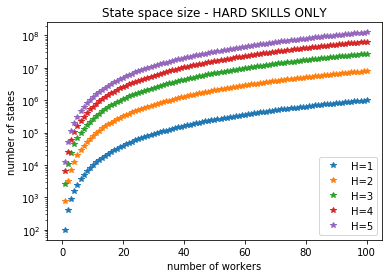

In [11]:
plt.plot(w_list, ss_h_1, '*', label='H=1')
plt.plot(w_list, ss_h_2, '*', label='H=2')
plt.plot(w_list, ss_h_3, '*', label='H=3')
plt.plot(w_list, ss_h_4, '*', label='H=4')
plt.plot(w_list, ss_h_5, '*', label='H=5')
plt.yscale('log')
plt.legend()
plt.xlabel('number of workers');
plt.ylabel('number of states');
plt.title('State space size - HARD SKILLS ONLY');

#### So the full state-action space size is:

In [16]:
for i in [2,5,10,15,20,30,100]:
    print("%.2e for %d workers." % (calculate_ss_size_hard_skills_only(i,5) * i * 5, i))

5.00e+05 for 2 workers.
7.81e+06 for 5 workers.
6.25e+07 for 10 workers.
2.11e+08 for 15 workers.
5.00e+08 for 20 workers.
1.69e+09 for 30 workers.
6.25e+10 for 100 workers.


This is more manageable but still the tabular methods may only be possible with a very small number of workers. We will need to try it out to determine what is possible.

### For the smaller sub-task of optimisng soft skills and team creativity:

This is a smaller problem than the hard-skills because we do not need to know the project skill requirements or the worker skill allocations (only team membership). But we do gain a factor of five for the project creativity. 

In [17]:
def calculate_ss_size_soft_skills_only(W, H):
    
    return 5 * W * H * 5 * 2 * W   

In [18]:
w_list = range(101)

ss_h_1 = [calculate_ss_size_soft_skills_only(w, 1) for w in w_list]
ss_h_2 = [calculate_ss_size_soft_skills_only(w, 2) for w in w_list]
ss_h_3 = [calculate_ss_size_soft_skills_only(w, 3) for w in w_list]
ss_h_4 = [calculate_ss_size_soft_skills_only(w, 4) for w in w_list]
ss_h_5 = [calculate_ss_size_soft_skills_only(w, 5) for w in w_list]

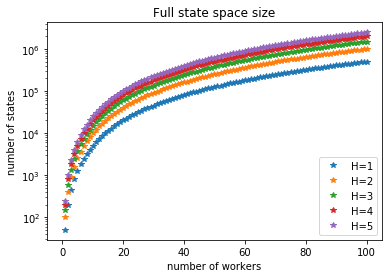

In [19]:
plt.plot(w_list, ss_h_1, '*', label='H=1')
plt.plot(w_list, ss_h_2, '*', label='H=2')
plt.plot(w_list, ss_h_3, '*', label='H=3')
plt.plot(w_list, ss_h_4, '*', label='H=4')
plt.plot(w_list, ss_h_5, '*', label='H=5')
plt.yscale('log')
plt.legend()
plt.xlabel('number of workers');
plt.ylabel('number of states');
plt.title('Full state space size');

#### So the full state-action space size is:

In [20]:
for i in [2,5,10,15,20,30,100]:
    print("%.2e for %d workers." % (calculate_ss_size_soft_skills_only(i,5) * i * 5, i))

1.00e+04 for 2 workers.
1.56e+05 for 5 workers.
1.25e+06 for 10 workers.
4.22e+06 for 15 workers.
1.00e+07 for 20 workers.
3.38e+07 for 30 workers.
1.25e+09 for 100 workers.
